In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

In [2]:
df_sleep = pd.read_csv('../../data/sleep.csv', index_col='date')
df_sleep

,deep_sleep_time,shallow_sleep_time,wake_time,start,stop
date,,,,,
2022-09-13,0,0,0,2022-09-11 22:00:00+0000,2022-09-11 22:00:00+0000
2022-09-14,77,421,2,2022-09-13 21:27:00+0000,2022-09-14 05:47:00+0000
2022-09-15,60,429,0,2022-09-14 21:57:00+0000,2022-09-15 06:06:00+0000
2022-09-16,82,286,0,2022-09-15 23:28:00+0000,2022-09-16 05:36:00+0000
2022-09-17,70,453,0,2022-09-16 22:22:00+0000,2022-09-17 07:05:00+0000
...,...,...,...,...,...
2024-04-21,105,528,3,2024-04-20 21:55:00+0000,2024-04-21 08:31:00+0000
2024-04-22,82,430,0,2024-04-21 22:03:00+0000,2024-04-22 06:35:00+0000
2024-04-23,49,375,0,2024-04-22 23:34:00+0000,2024-04-23 06:38:00+0000


Rolling Statistics Imputation: Need to clean 0 values as "missing" values as moving average (test with windows of 7 and 30)

In [3]:
px.line(df_sleep['deep_sleep_time'])

In [9]:
px.line(df_sleep['shallow_sleep_time'])

In [10]:
px.line(df_sleep['wake_time'])

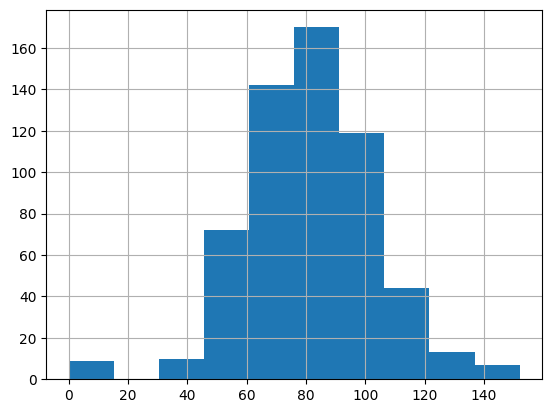

In [11]:
hist = df_sleep['deep_sleep_time'].hist()

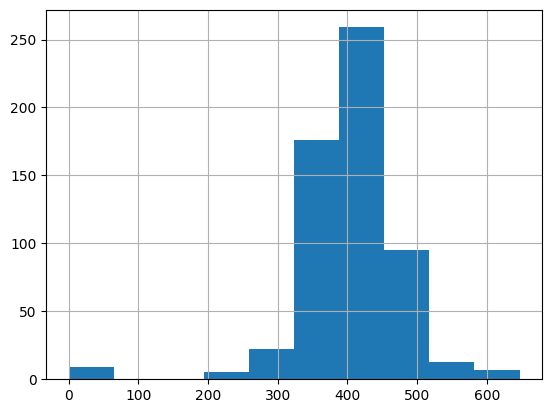

In [12]:
hist = df_sleep['shallow_sleep_time'].hist()

Wake time histogram with 0-10 spike. The rest of the data can be dismissed.

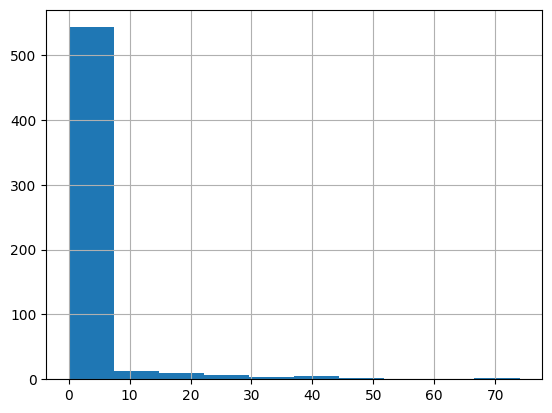

In [13]:
hist = df_sleep['wake_time'].hist()

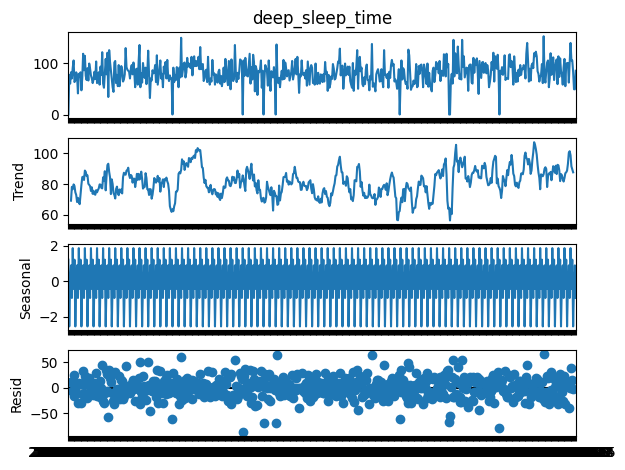

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_sleep['deep_sleep_time'], model='additive', period=7)
r = result.plot()

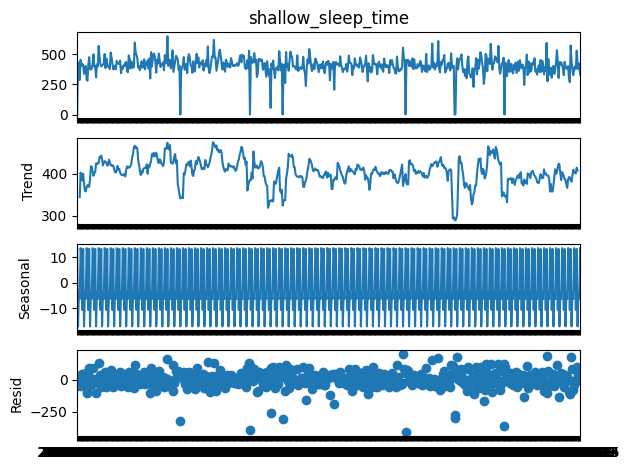

In [16]:
result = seasonal_decompose(df_sleep['shallow_sleep_time'], model='additive', period=7)
r = result.plot()

In [19]:
deep_sleep_timeserie = go.Figure(data=go.Scatter(x=df_sleep.index, 
                        y=df_sleep['deep_sleep_time'],
                        marker_color='indianred', text="deep_sleep"))

deep_sleep_timeserie.show()

In [23]:
df_sleep.index

Index(['2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
       '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
       ...
       '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
       '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25'],
      dtype='object', name='date', length=586)

In [45]:
rolmean = df_sleep.rolling(window=7).mean()
rolmean.set_index(df_sleep.index, inplace=True)
rolmean

/tmp/ipykernel_866/1114837157.py:1: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['start', 'stop'], dtype='object')



,deep_sleep_time,shallow_sleep_time,wake_time
date,,,
2022-09-13,NaN,NaN,NaN
2022-09-14,NaN,NaN,NaN
2022-09-15,NaN,NaN,NaN
2022-09-16,NaN,NaN,NaN
2022-09-17,NaN,NaN,NaN
...,...,...,...
2024-04-21,101.428571,403.857143,8.000000
2024-04-22,98.857143,402.000000,8.000000
2024-04-23,91.571429,401.142857,8.000000


In [46]:
moving_average_sleep = go.Figure(data=[
    go.Scatter(x=df_sleep.index, 
    y=df_sleep['deep_sleep_time'].values,
    marker_color='indianred', text="ma_sleep"),
    go.Scatter(x=df_sleep.index, 
    y=rolmean['deep_sleep_time'].values,
    marker_color='blue', text="deep_sleep")])

moving_average_sleep.show()

In [40]:
moving_average_sleep = go.Figure(data=[
    go.Scatter(x=df_sleep.index, 
    y=df_sleep['shallow_sleep_time'].values,
    marker_color='indianred', text="ma_sleep"),
    go.Scatter(x=df_sleep.index, 
    y=rolmean['shallow_sleep_time'].values,
    marker_color='blue', text="deep_sleep")])

moving_average_sleep.show()

In [49]:
df_sleep_sqrt = np.sqrt(df_sleep['deep_sleep_time'])
df_sleep_dif_sqrt = df_sleep_sqrt.diff()

In [53]:
sleep_dif_sqrt = go.Figure(data=[
    go.Scatter(x=df_sleep.index, 
    y=df_sleep_dif_sqrt.values,
    marker_color='indianred', text="ma_sleep")])

sleep_dif_sqrt.show()

Spikes on 0 values need to be cleaned.

In [54]:
rolstd_dif_sqrt = df_sleep_dif_sqrt.rolling(window=6).mean()
rolmean_dif_sqrt = df_sleep_dif_sqrt.rolling(window=6).std()

In [55]:
moving_average_sleep = go.Figure(data=[
    go.Scatter(x=df_sleep.index, 
    y=rolstd_dif_sqrt.values,
    marker_color='indianred', text="ma_sleep"),
    go.Scatter(x=df_sleep.index, 
    y=rolmean_dif_sqrt.values,
    marker_color='blue', text="deep_sleep")])

moving_average_sleep.show()

## 2023 series selection


In [4]:
start_date = '2023-01-01'
end_date = '2023-12-31'
mask = (df_sleep.index >= start_date) & (df_sleep.index <= end_date)
df_2023 = df_sleep.loc[mask]

In [5]:
df_2023

,deep_sleep_time,shallow_sleep_time,wake_time,start,stop
date,,,,,
2023-01-01,93,419,1,2023-01-01 00:45:00+0000,2023-01-01 09:18:00+0000
2023-01-02,80,530,8,2023-01-01 22:27:00+0000,2023-01-02 08:45:00+0000
2023-01-03,102,352,1,2023-01-03 00:18:00+0000,2023-01-03 07:53:00+0000
2023-01-04,70,398,0,2023-01-04 00:26:00+0000,2023-01-04 08:14:00+0000
2023-01-05,106,440,0,2023-01-04 23:14:00+0000,2023-01-05 08:20:00+0000
...,...,...,...,...,...
2023-12-27,62,332,0,2023-12-27 01:47:00+0000,2023-12-27 08:21:00+0000
2023-12-28,60,454,0,2023-12-28 00:12:00+0000,2023-12-28 08:46:00+0000
2023-12-29,110,379,0,2023-12-29 00:44:00+0000,2023-12-29 08:53:00+0000


In [17]:
px.line(df_2023['deep_sleep_time'])

None values imputation: Considering 0's as None values, using 7 days as a window. Need to test it with 30 days.

In [38]:
df_2023 = df_2023.replace(0, np.nan)
df_2023['deep_sleep_time'].fillna(df_2023['deep_sleep_time'].rolling(window=7, min_periods=None).mean(), inplace=True)
df_2023['shallow_sleep_time'].fillna(df_2023['shallow_sleep_time'].rolling(window=7, min_periods=None).mean(), inplace=True)

In [39]:
df_2023['deep_sleep_time']

date
2023-01-01     93.0
2023-01-02     80.0
2023-01-03    102.0
2023-01-04     70.0
2023-01-05    106.0
              ...  
2023-12-27     62.0
2023-12-28     60.0
2023-12-29    110.0
2023-12-30     81.0
2023-12-31    105.0
Name: deep_sleep_time, Length: 360, dtype: float64

In [40]:
px.line(df_2023['deep_sleep_time'])

In [ ]:
rolmean_2023 = df_2023.rolling(window=7).mean()
rolmean_2023.set_index(df_2023.index, inplace=True)
rolmean_2023

In [52]:
moving_average_dsleep_2023 = go.Figure(data=[
    go.Scatter(x=df_2023.index, 
    y=df_2023['deep_sleep_time'].values,
    marker_color='indianred', text="ma_sleep"),
    go.Scatter(x=df_2023.index, 
    y=rolmean_2023['deep_sleep_time'].values,
    marker_color='blue', text="deep_sleep")])

moving_average_dsleep_2023.show()

In [41]:
px.line(df_2023['shallow_sleep_time'])

In [53]:
moving_average_ssleep_2023 = go.Figure(data=[
    go.Scatter(x=df_2023.index, 
    y=df_2023['shallow_sleep_time'].values,
    marker_color='indianred', text="ma_sleep"),
    go.Scatter(x=df_2023.index, 
    y=rolmean_2023['shallow_sleep_time'].values,
    marker_color='blue', text="shallow_sleep")])

moving_average_ssleep_2023.show()

Preserving 0 values on wake_time time series.

In [ ]:
df_2023['wake_time'].fillna(0, inplace=True)

In [44]:
px.line(df_2023['wake_time'])